<a href="https://colab.research.google.com/github/santomon/delirium/blob/pca_remaster/notebooks/Delirium_InferenceToPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Quang Anh Le Hong

This notebook contains the entire procedure of running inference on the BOLD5000 to building the ridge regression model to plotting the results.

For ASTMT models, my pre-trained models will be used.
For Taskonomy pre-generated features will be imported, since executing the algorithm is very slow.

- even still, the runtime might actually exceed the maximum runtime on google colab...total runtime estimated to be roughly 8 hours

- the way I did it was essentially save results to a mounted gdrive

- the notebook was tested using colab pro with extended RAM and GPU, highest CPU RAM allocation observed was 17.5GB using DeeplabV3

## Dependencies

In [ ]:
!git clone https://github.com/santomon/delirium
%cd delirium
!git checkout pca_remaster
!git clone https://github.com/santomon/NeuralTaskonomy
!git clone https://github.com/santomon/astmt

!pip install gdown --upgrade
!pip install pyyaml==5.1
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

In [ ]:
#working dir
%cd /content/delirium

/content/delirium


In [ ]:
#import libraries
import sys
import os
import delirium

#fetching BOLD5000 data
delirium.get_BOLD5K_Stimuli('/content')
delirium.get_BOLD5K_ROI_data("/content")

#config
result_path = "/content/results"
output_path = "/content/output"

112it [00:12,  9.19it/s]
402it [02:24,  2.79it/s]


## Extracting features from appropriate layers of the encoders

In [ ]:
# generate features with the pre-trained astmt models
!python inference/inference.py --module astmt_inference --save_path $output_path

# generate features with the models provided by torch
!python inference/inference.py --module torch_inference --model deeplabv3_resnet50 --save_path $output_path
!python inference/inference.py --module torch_inference --model fcn_resnet50 --save_path $output_path

# generate features with the detectron model
!python inference/inference.py --module detectron_inference --model COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml --layer p5 --save_path $output_path

In [ ]:
# download pre-generated features from the Taskonomy segmentsemantic, edge2d and rgb2sfnorm
# they were generated by running the run_img_task.py on every image of the stimuli
delirium.download_taskonomy_features("/content/output/taskonomy_inference")

Downloading...
From: https://drive.google.com/u/0/uc?export=download&confirm=oakK&id=1WFb4F9a7BnqXbBKOP_xe77gDNiLlt4qZ
To: /content/delirium/tmp/rgb2sfnorm_encoder_output.zip
341MB [00:02, 115MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?export=download&confirm=Oofu&id=18XrUM3UlwmX_RgYoJH1ycNvpLSb1JH0f
To: /content/delirium/tmp/edge2d_encoder_output.zip
166MB [00:01, 140MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?export=download&confirm=WPRB&id=1KBqD2ccAMJi3hQhLHl2qBDuVsXoTzjRL
To: /content/delirium/tmp/segmentsemantic_encoder_output.zip
733MB [00:05, 124MB/s]


## Run the ridge regression

In [ ]:
# Torch models
!python main.py --module torch_inference --model deeplabv3_resnet50 --do_pca 2048 --fix_testing --data_path $output_path --save_path $result_path
!python main.py --module torch_inference --model fcn_resnet50 --do_pca 2048 --fix_testing --data_path $output_path --save_path $result_path

# ASTMT models
!python main.py --module astmt_inference --fix_testing --do_pca 2048 --data_path $output_path --model imagenet_pretr --save_path $result_path

!python main.py --module astmt_inference --fix_testing --do_pca 2048 --data_path $output_path --fname_spec edge --model pascal_edge_scratch_SSF --save_path $result_path
!python main.py --module astmt_inference --fix_testing --do_pca 2048 --data_path $output_path --fname_spec edge --model pascal_edge_imagenet_SSF --save_path $result_path
!python main.py --module astmt_inference --fix_testing --do_pca 2048 --data_path $output_path --fname_spec semseg --model pascal_semseg_scratch_SSF --save_path $result_path
!python main.py --module astmt_inference --fix_testing --do_pca 2048 --data_path $output_path --fname_spec semseg --model pascal_semseg_imagenet_SSF --save_path $result_path
!python main.py --module astmt_inference --fix_testing --do_pca 2048 --data_path $output_path --fname_spec normals --model pascal_normals_scratch_SSF --save_path $result_path
!python main.py --module astmt_inference --fix_testing --do_pca 2048 --data_path $output_path --fname_spec normals --model pascal_normals_imagenet_SSF --save_path $result_path

!python main.py --module astmt_inference --fix_testing --do_pca 2048 --data_path $output_path --fname_spec edge --model nyud_edge_scratch_SSF --save_path $result_path
!python main.py --module astmt_inference --fix_testing --do_pca 2048 --data_path $output_path --fname_spec edge --model nyud_edge_imagenet_SSF --save_path $result_path
!python main.py --module astmt_inference --fix_testing --do_pca 2048 --data_path $output_path --fname_spec semseg --model nyud_semseg_scratch_SSF --save_path $result_path
!python main.py --module astmt_inference --fix_testing --do_pca 2048 --data_path $output_path --fname_spec semseg --model nyud_semseg_imagenet_SSF --save_path $result_path
!python main.py --module astmt_inference --fix_testing --do_pca 2048 --data_path $output_path --fname_spec normals --model nyud_normals_scratch_SSF --save_path $result_path
!python main.py --module astmt_inference --fix_testing --do_pca 2048 --data_path $output_path --fname_spec normals --model nyud_normals_imagenet_SSF --save_path $result_path



# Detectron2 models
!python main.py --module detectron_inference --model COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml --do_pca 2048 --fix_testing --data_path $output_path --save_path $result_path

#Taskonomy models; no PCA is done here, since the features are already of size 2048
!python main.py --module taskonomy_inference --model edge2d --fix_testing --data_path $output_path --save_path $result_path
!python main.py --module taskonomy_inference --model segmentsemantic --fix_testing --data_path $output_path --save_path $result_path
!python main.py --module taskonomy_inference --model rgb2sfnorm --fix_testing --data_path $output_path --save_path $result_path


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
SE for task: edge
Using parallel adapters
Initializing squeeze and excitation modules:
SE for task: edge
Using parallel adapters
Initializing squeeze and excitation modules:
SE for task: edge
Initializing squeeze and excitation modules:
SE for task: edge
Using parallel adapters
Initializing squeeze and excitation modules:
SE for task: edge
Using parallel adapters
Initializing squeeze and excitation modules:
SE for task: edge
Using parallel adapters
Initializing squeeze and excitation modules:
SE for task: edge
Using parallel adapters
Using Discriminator

Initializing Fully Convolutional Discriminator with depth: 2 and kernel size: 3

Verification: Trainable batchnorm parameters? Answer: True

Asynchronous bnorm layers: 62
Loading pre-trained ImageNet model
Loading se_resnet50 Imagenet

Content of 138 out of 138 layers successfully copied, including 80 task-specific layers

Initializing weights from: ./astmt/models/SSF/n

## Generate the Bar / Violin / Box - Plots

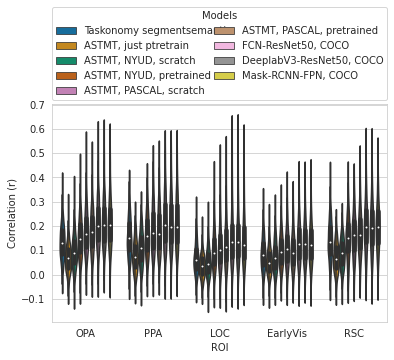

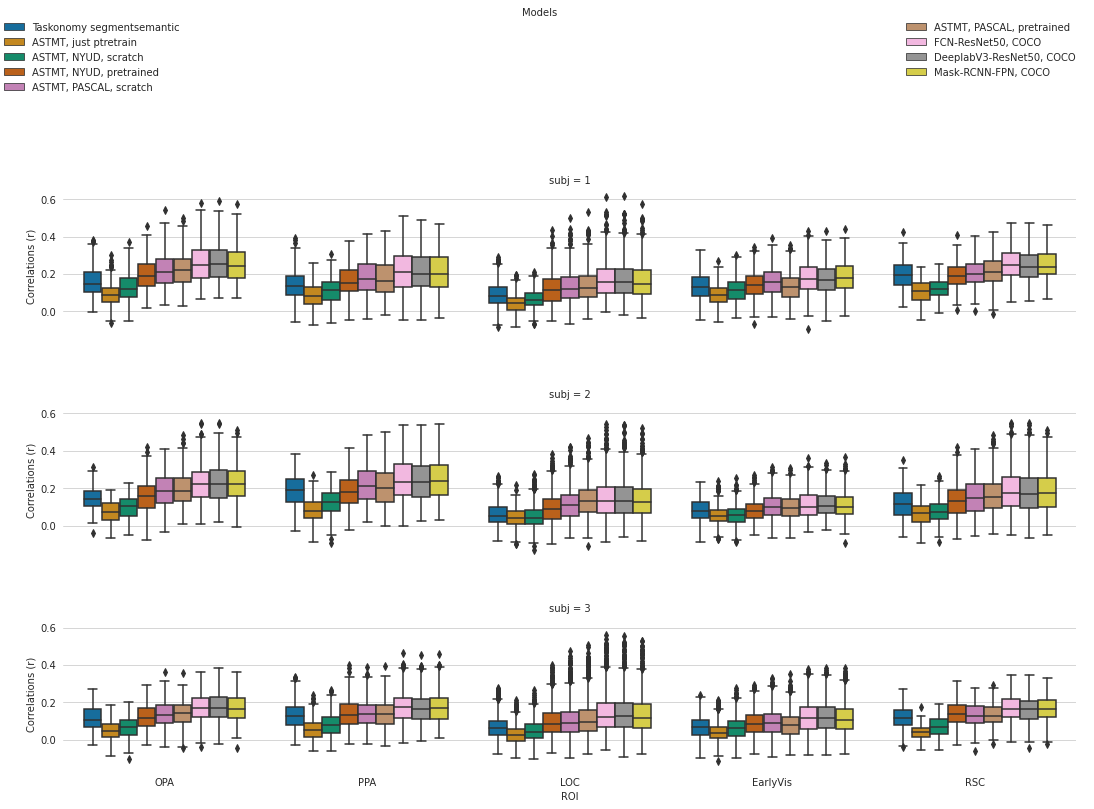

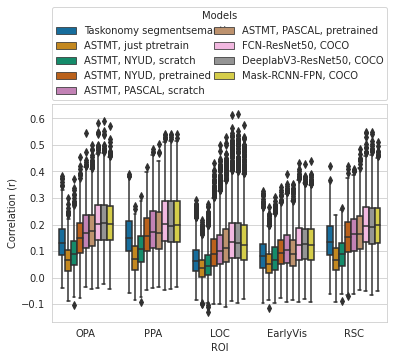

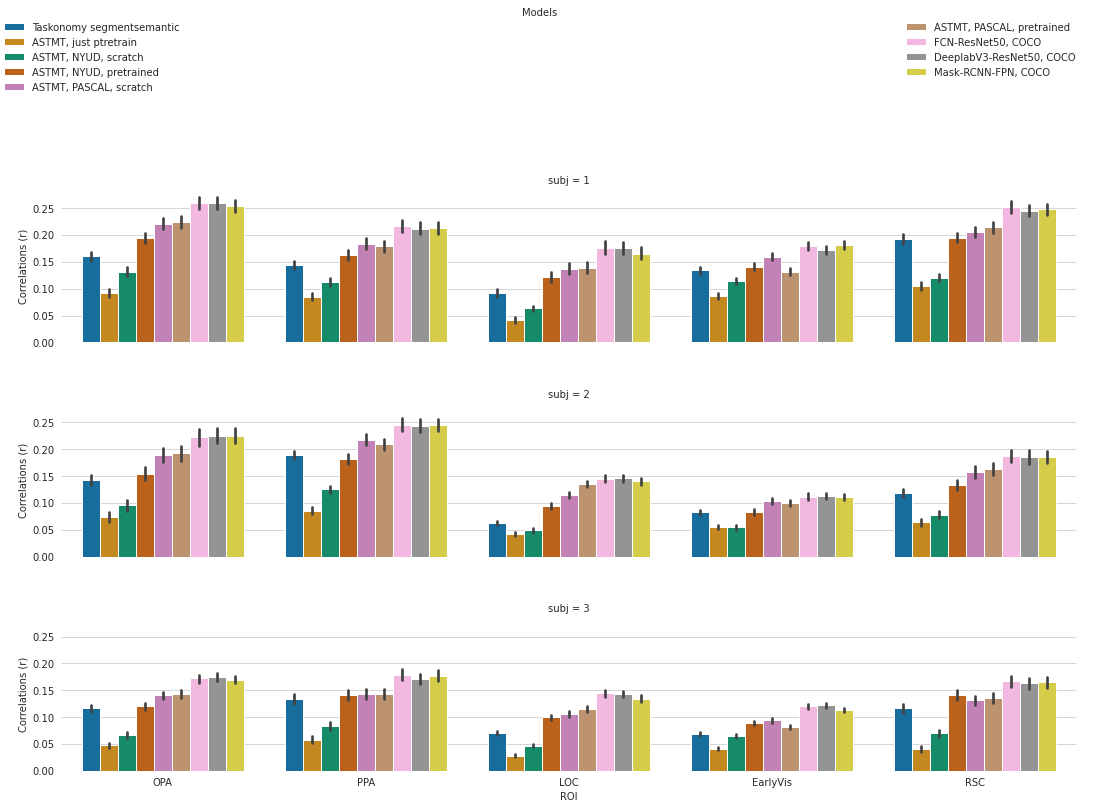

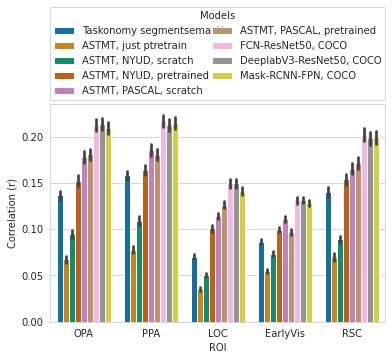

In [ ]:
#plot correlations for semantic segmentation
!mkdir /content/plots/semseg_corr_plots -p
import plot_crs as pc

hue_order_semseg = [ "segmentsemantic",'imagenet_pretr', "nyud_semseg_scratch_SSF_semseg", "nyud_semseg_imagenet_SSF_semseg",
                    "pascal_semseg_scratch_SSF_semseg", "pascal_semseg_imagenet_SSF_semseg", "fcn_resnet50", "deeplabv3_resnet50", "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"]
legend_labels_semseg = [ "Taskonomy segmentsemantic",'ASTMT, just ptretrain', "ASTMT, NYUD, scratch", "ASTMT, NYUD, pretrained",
                    "ASTMT, PASCAL, scratch", "ASTMT, PASCAL, pretrained", "FCN-ResNet50, COCO", "DeeplabV3-ResNet50, COCO", "Mask-RCNN-FPN, COCO"]

semseg_plotter = pc.Plotter()
semseg_plotter.load_NT_corrs("segmentsemantic")
semseg_plotter.load_corrs("astmt_inference", "nyud_semseg_scratch_SSF", True, True, False, [3, 4], result_path, "semseg")
semseg_plotter.load_corrs("astmt_inference", "nyud_semseg_imagenet_SSF", True, True, False, [3, 4], result_path, "semseg")
semseg_plotter.load_corrs("astmt_inference", "pascal_semseg_scratch_SSF", True, True, False, [3, 4], result_path, "semseg")
semseg_plotter.load_corrs("astmt_inference", "pascal_semseg_imagenet_SSF", True, True, False, [3, 4], result_path, "semseg")
semseg_plotter.load_corrs("astmt_inference", "imagenet_pretr", True, True, False, [3, 4], result_path)

semseg_plotter.load_corrs("torch_inference", "fcn_resnet50", True, True, False, [3, 4], result_path)
semseg_plotter.load_corrs("torch_inference", "deeplabv3_resnet50", True, True, False, [3, 4], result_path)
semseg_plotter.load_corrs("detectron_inference", "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml", True, True, False, [3, 4], result_path)

semseg_plotter.plot_for_all_subjects_individually("violin", "/content/plots/semseg_corr_plots/violin_semseg_subjects.png", legend_labels=legend_labels_semseg, hue_order=hue_order_semseg, hue="model_name", backend="agg")
semseg_plotter.plot_average_for_all_subjects("violin", "/content/plots/semseg_corr_plots/violin_semseg_overview.png", legend_labels=legend_labels_semseg, hue_order=hue_order_semseg, hue="model_name", backend="agg")
semseg_plotter.plot_for_all_subjects_individually("box", "/content/plots/semseg_corr_plots/box_semseg_subjects.png", legend_labels=legend_labels_semseg, hue_order=hue_order_semseg, hue="model_name", backend="agg")
semseg_plotter.plot_average_for_all_subjects("box", "/content/plots/semseg_corr_plots/box_semseg_overview.png", legend_labels=legend_labels_semseg, hue_order=hue_order_semseg, hue="model_name", backend="agg")
semseg_plotter.plot_for_all_subjects_individually("bar", "/content/plots/semseg_corr_plots/bar_semseg_subjects.png", legend_labels=legend_labels_semseg, hue_order=hue_order_semseg, hue="model_name", backend="agg")
semseg_plotter.plot_average_for_all_subjects("bar", "/content/plots/semseg_corr_plots/bar_semseg_overview.png", legend_labels=legend_labels_semseg, hue_order=hue_order_semseg, hue="model_name", backend="agg")



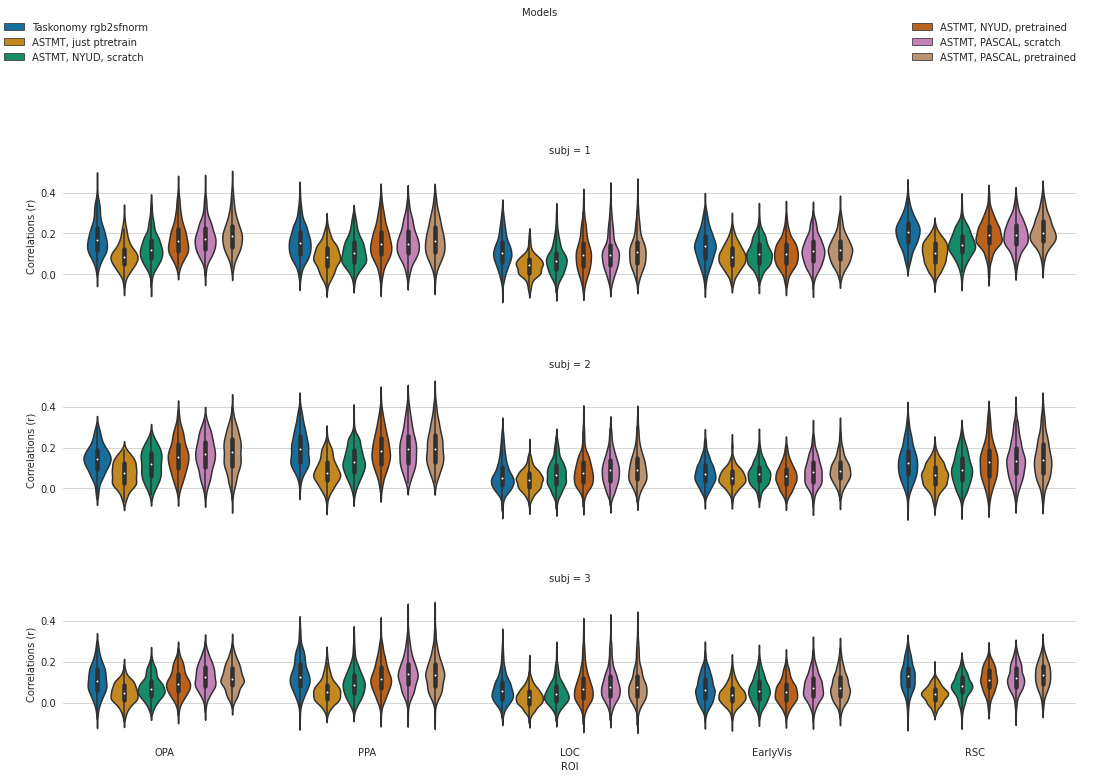

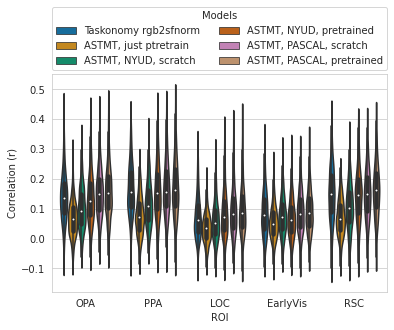

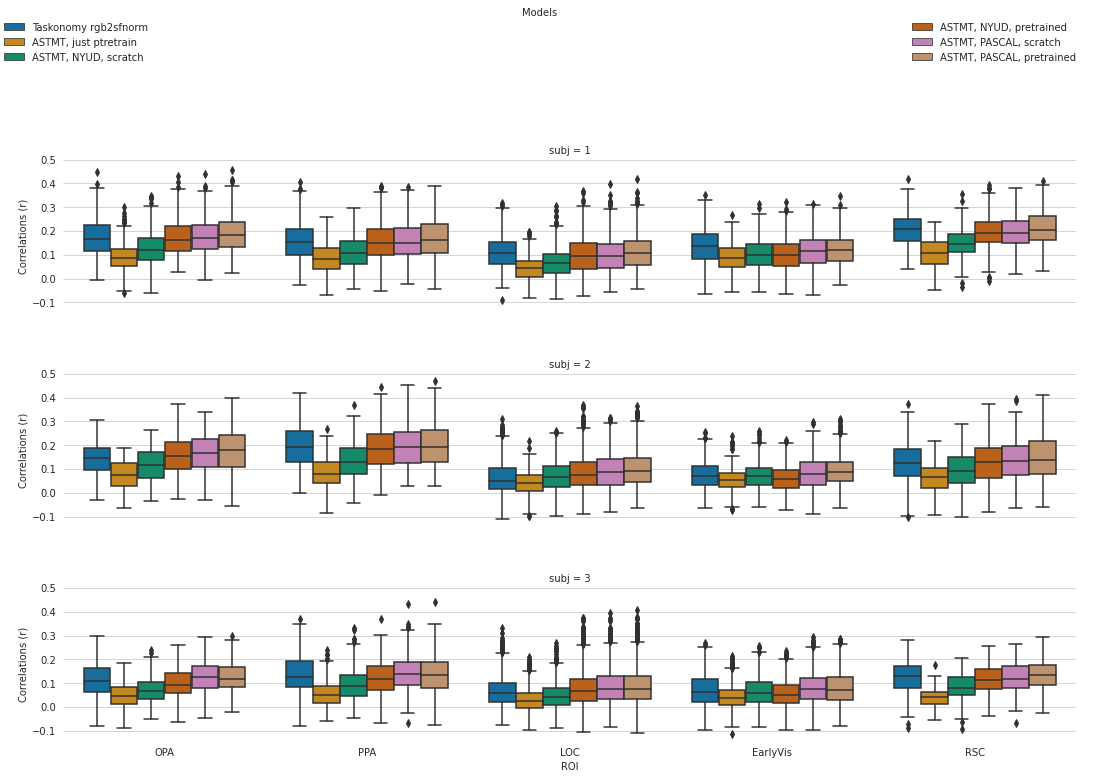

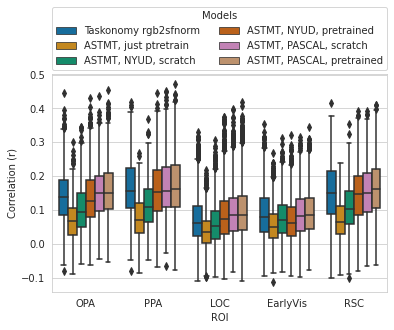

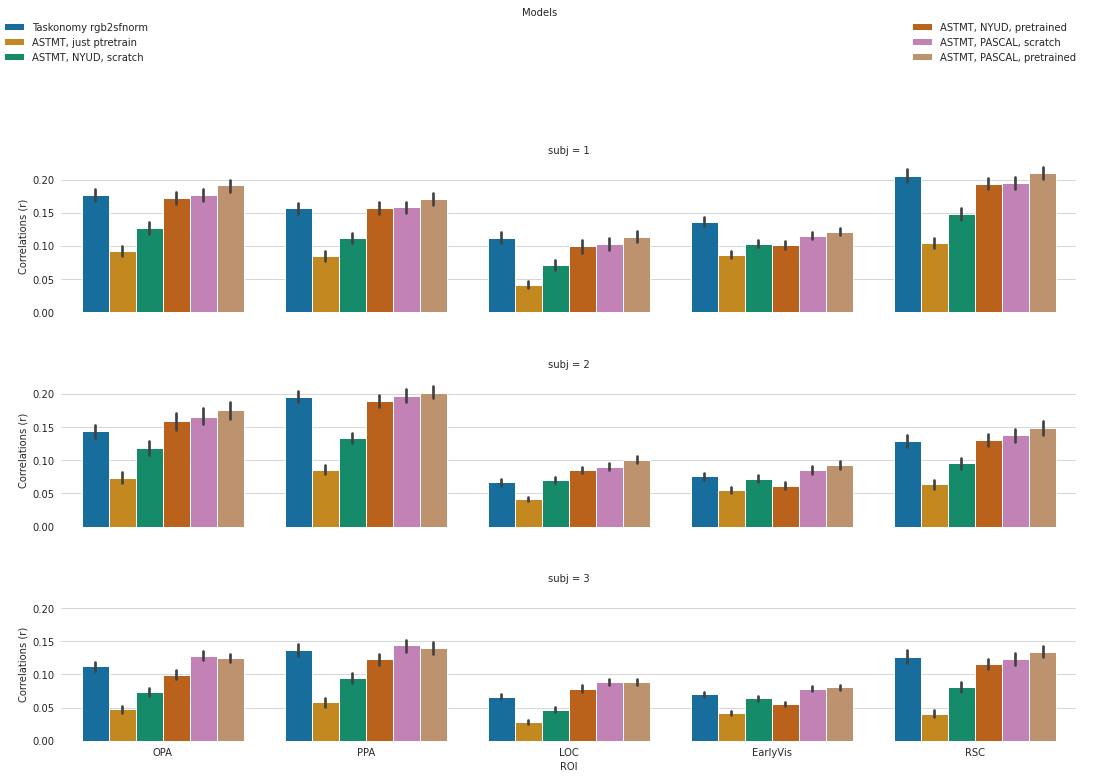

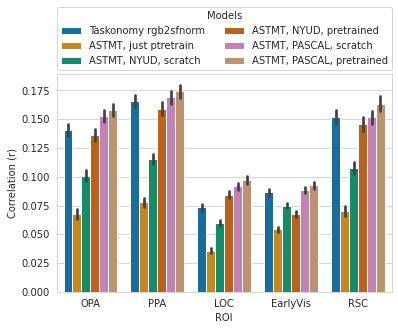

In [9]:
#plot correlations for surface normal estimation
!mkdir /content/plots/normals_corr_plots -p

import plot_crs as pc

hue_order_normals = [ "rgb2sfnorm",'imagenet_pretr', "nyud_normals_scratch_SSF_normals", "nyud_normals_imagenet_SSF_normals",
                    "pascal_normals_scratch_SSF_normals", "pascal_normals_imagenet_SSF_normals"]
legend_labels_normals = [ "Taskonomy rgb2sfnorm",'ASTMT, just ptretrain', "ASTMT, NYUD, scratch", "ASTMT, NYUD, pretrained",
                    "ASTMT, PASCAL, scratch", "ASTMT, PASCAL, pretrained"]

normals_plotter = pc.Plotter()
normals_plotter.load_NT_corrs("rgb2sfnorm")
normals_plotter.load_corrs("astmt_inference", "nyud_normals_scratch_SSF", True, True, False, [3, 4], result_path, "normals")
normals_plotter.load_corrs("astmt_inference", "nyud_normals_imagenet_SSF", True, True, False, [3, 4], result_path, "normals")
normals_plotter.load_corrs("astmt_inference", "pascal_normals_scratch_SSF", True, True, False, [3, 4], result_path, "normals")
normals_plotter.load_corrs("astmt_inference", "pascal_normals_imagenet_SSF", True, True, False, [3, 4], result_path, "normals")
normals_plotter.load_corrs("astmt_inference", "imagenet_pretr", True, True, False, [3, 4], result_path)


normals_plotter.plot_for_all_subjects_individually("violin","/content/plots/normals_corr_plots/violin_normals_subjects.png", hue="model_name", hue_order=hue_order_normals, legend_labels=legend_labels_normals, backend="agg")
normals_plotter.plot_average_for_all_subjects("violin", "/content/plots/normals_corr_plots/violin_normals_overview.png", hue="model_name", hue_order=hue_order_normals, legend_labels=legend_labels_normals, backend="agg")
normals_plotter.plot_for_all_subjects_individually("box","/content/plots/normals_corr_plots/box_normals_subjects.png", hue="model_name",  hue_order=hue_order_normals, legend_labels=legend_labels_normals, backend="agg")
normals_plotter.plot_average_for_all_subjects("box","/content/plots/normals_corr_plots/box_normals_overview.png", hue="model_name", hue_order=hue_order_normals, legend_labels=legend_labels_normals, backend="agg")
normals_plotter.plot_for_all_subjects_individually("bar","/content/plots/normals_corr_plots/bar_normals_subjects.png", hue="model_name", hue_order=hue_order_normals, legend_labels=legend_labels_normals, backend="agg")
normals_plotter.plot_average_for_all_subjects("bar","/content/plots/normals_corr_plots/bar_normals_overview.png", hue="model_name", hue_order=hue_order_normals, legend_labels=legend_labels_normals, backend="agg")



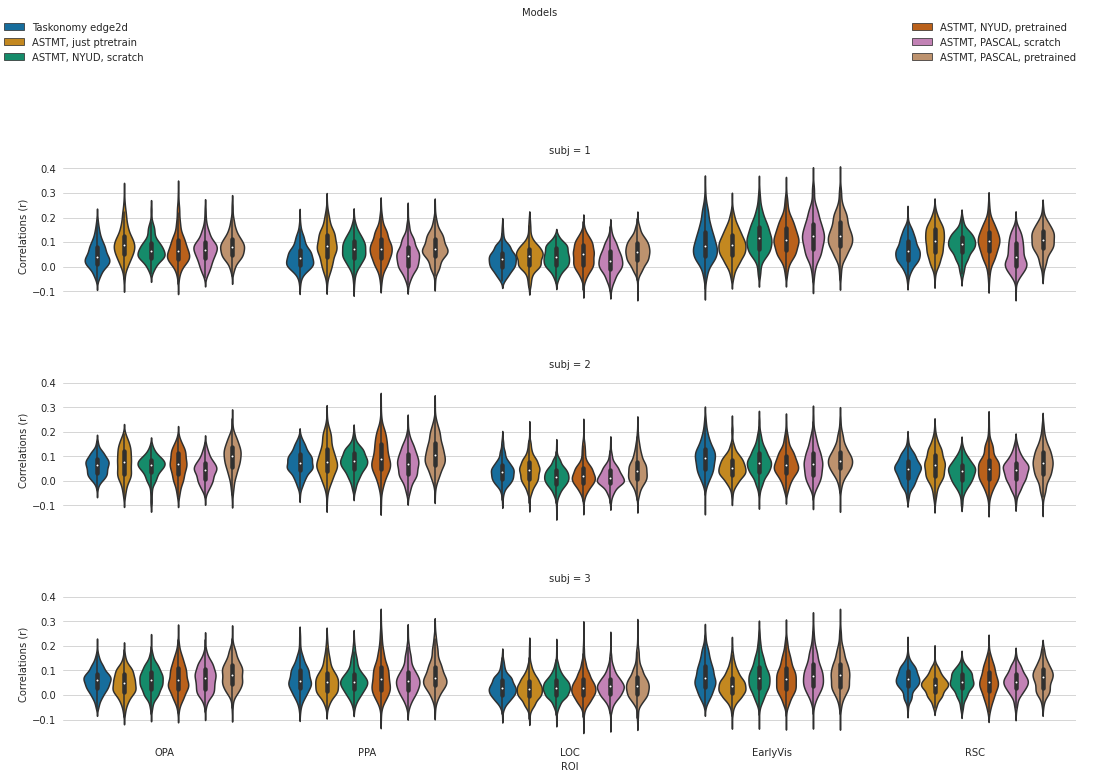

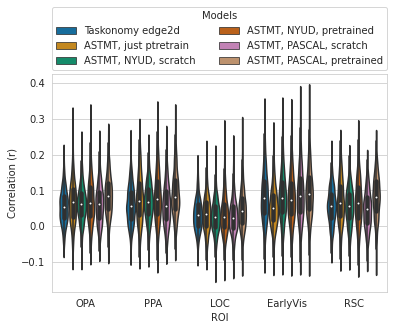

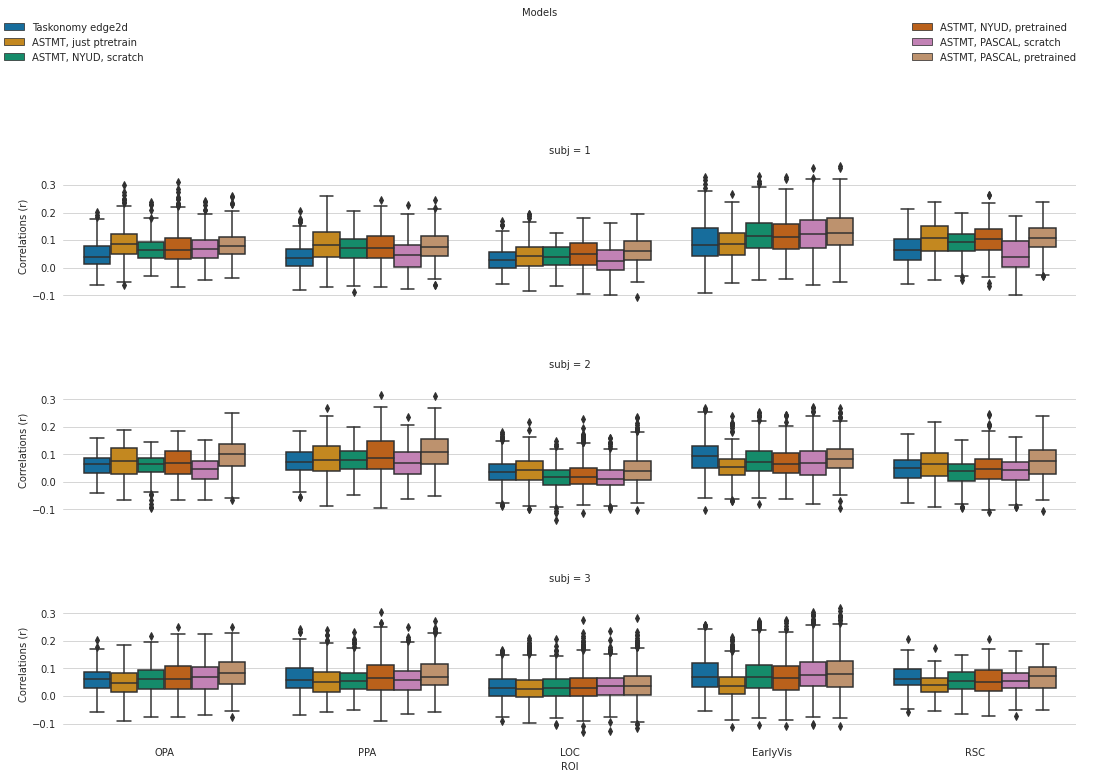

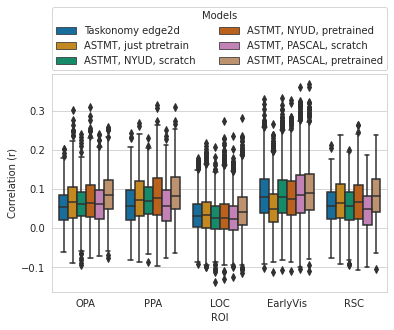

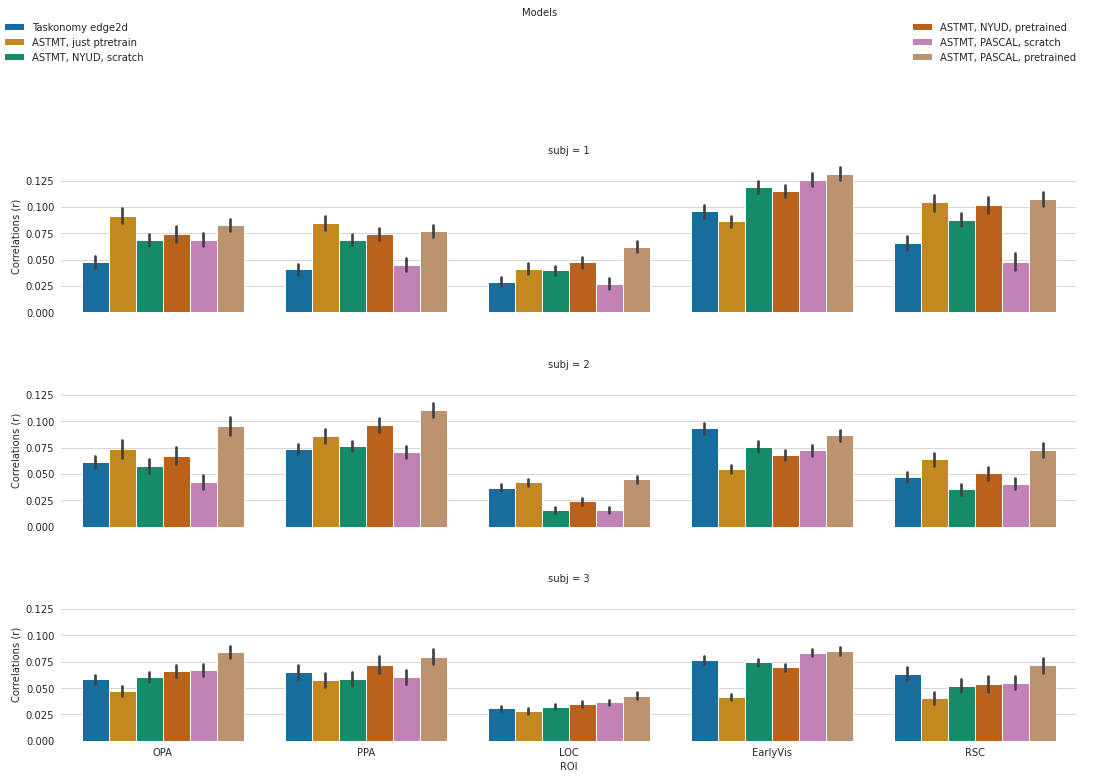

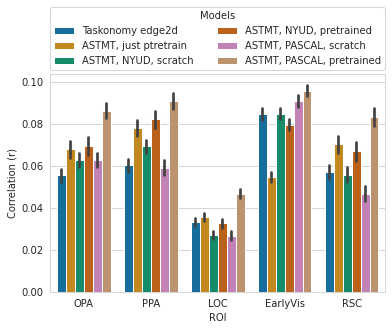

In [10]:
#plot correlation results for edge detection
!mkdir /content/plots/edge_corr_plots -p

import plot_crs as pc

hue_order_edge = [ "edge2d",'imagenet_pretr', "nyud_edge_scratch_SSF_edge", "nyud_edge_imagenet_SSF_edge",
                    "pascal_edge_scratch_SSF_edge", "pascal_edge_imagenet_SSF_edge"]
legend_labels_edge = [ "Taskonomy edge2d",'ASTMT, just ptretrain', "ASTMT, NYUD, scratch", "ASTMT, NYUD, pretrained",
                    "ASTMT, PASCAL, scratch", "ASTMT, PASCAL, pretrained"]

edge_plotter = pc.Plotter()
edge_plotter.load_NT_corrs("edge2d")
edge_plotter.load_corrs("astmt_inference", "nyud_edge_scratch_SSF", True, True, False, [3, 4], result_path, "edge")
edge_plotter.load_corrs("astmt_inference", "nyud_edge_imagenet_SSF", True, True, False, [3, 4], result_path, "edge")
edge_plotter.load_corrs("astmt_inference", "pascal_edge_scratch_SSF", True, True, False, [3, 4], result_path, "edge")
edge_plotter.load_corrs("astmt_inference", "pascal_edge_imagenet_SSF", True, True, False, [3, 4], result_path, "edge")
edge_plotter.load_corrs("astmt_inference", "imagenet_pretr", True, True, False, [3, 4], result_path)


edge_plotter.plot_for_all_subjects_individually("violin","/content/plots/edge_corr_plots/violin_edge_subjects.png", hue="model_name", hue_order=hue_order_edge, legend_labels=legend_labels_edge, backend="agg")
edge_plotter.plot_average_for_all_subjects("violin", "/content/plots/edge_corr_plots/violin_edge_overview.png", hue="model_name", hue_order=hue_order_edge, legend_labels=legend_labels_edge, backend="agg")
edge_plotter.plot_for_all_subjects_individually("box","/content/plots/edge_corr_plots/box_edge_subjects.png", hue="model_name",  hue_order=hue_order_edge, legend_labels=legend_labels_edge, backend="agg")
edge_plotter.plot_average_for_all_subjects("box","/content/plots/edge_corr_plots/box_edge_overview.png", hue="model_name", hue_order=hue_order_edge, legend_labels=legend_labels_edge, backend="agg")
edge_plotter.plot_for_all_subjects_individually("bar","/content/plots/edge_corr_plots/bar_edge_subjects.png", hue="model_name", hue_order=hue_order_edge, legend_labels=legend_labels_edge, backend="agg")
edge_plotter.plot_average_for_all_subjects("bar","/content/plots/edge_corr_plots/bar_edge_overview.png", hue="model_name", hue_order=hue_order_edge, legend_labels=legend_labels_edge, backend="agg")


## Generate the Permutation Plots

In [3]:
#generate permutations

import permutation as perm

permutator = perm.Permutator()
permutator.load_predictions("taskonomy_inference", "edge2d", False, True, False, [3, 4], "edge2d", result_path)
permutator.load_predictions("taskonomy_inference", "segmentsemantic", False, True, False, [3, 4], "segmentsemantic", result_path)
permutator.load_predictions("taskonomy_inference", "rgb2sfnorm", False, True, False, [3, 4], "rgb2sfnorm", result_path)


# permutator.load_predictions("torch_inference", "deeplabv3_resnet50", False, True, False, [3, 4], result_path)
permutator.load_predictions("torch_inference", "deeplabv3_resnet50", True, True, False, [3, 4],"segmentsemantic", result_path)

permutator.load_predictions("torch_inference", "fcn_resnet50", True, True, False, [3, 4],"segmentsemantic", result_path)

permutator.load_predictions("detectron_inference", "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml", True, True, False, [3, 4], "segmentsemantic", result_path)

###

permutator.load_predictions("astmt_inference", "imagenet_pretr", True, True, False, [3, 4],"edge2d", result_path)

permutator.load_predictions("astmt_inference", "nyud_edge_imagenet_SSF", True, True, False, [3, 4],"edge2d", result_path, "edge")
permutator.load_predictions("astmt_inference", "nyud_edge_scratch_SSF", True, True, False, [3, 4],"edge2d", result_path, "edge")

permutator.load_predictions("astmt_inference", "nyud_semseg_imagenet_SSF", True, True, False, [3, 4],"segmentsemantic", result_path, "semseg")
permutator.load_predictions("astmt_inference", "nyud_semseg_scratch_SSF", True, True, False, [3, 4],"segmentsemantic", result_path, "semseg")

permutator.load_predictions("astmt_inference", "nyud_normals_imagenet_SSF", True, True, False, [3, 4],"rgb2sfnorm", result_path, "normals")
permutator.load_predictions("astmt_inference", "nyud_normals_scratch_SSF", True, True, False, [3, 4],"rgb2sfnorm", result_path, "normals")

##
permutator.load_predictions("astmt_inference", "pascal_edge_imagenet_SSF", True, True, False, [3, 4],"edge2d", result_path, "edge")
permutator.load_predictions("astmt_inference", "pascal_edge_scratch_SSF", True, True, False, [3, 4],"edge2d", result_path, "edge")

permutator.load_predictions("astmt_inference", "pascal_semseg_imagenet_SSF", True, True, False, [3, 4],"segmentsemantic", result_path, "semseg")
permutator.load_predictions("astmt_inference", "pascal_semseg_scratch_SSF", True, True, False, [3, 4],"segmentsemantic", result_path, "semseg")

permutator.load_predictions("astmt_inference", "pascal_normals_imagenet_SSF", True, True, False, [3, 4],"rgb2sfnorm", result_path, "normals")
permutator.load_predictions("astmt_inference", "pascal_normals_scratch_SSF", True, True, False, [3, 4],"rgb2sfnorm", result_path, "normals")

permutator.permute(save_dir_root=result_path)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


mkdir: cannot create directory ‘/content/plots’: File exists


/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


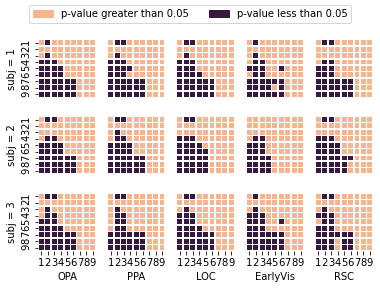

In [4]:
#generate permutation plots for semseg
!mkdir /content/plots
import permutation as perm


labels_semseg = ["taskonomy segmentsemantic",               # 1
          "ASTMT pretrained only",                          # 2
          "ASTMT, NYUD, scratch",                           # 3
          "ASTMT, NYUD, pretrained",                        # 4
          "ASTMT, PASCAL, scratch",                         # 5
          "ASTMT, PASCAL, pretrained",                      # 6
          "FCNRN50, COCO",                                  # 7
          "DeeplabV3RN50, COCO",                            # 8
          "MaskRCNN-FPN-RN50, COCO"]                        # 9
labels2_semseg = [1, 2, 3, 4, 5, 6, 7, 8, 9]

ptator = perm.Permutator()
ptator.load_permutations_and_pvalues("taskonomy_inference", "segmentsemantic", False, True, False, [3, 4], "segmentsemantic",  result_path)
ptator.load_permutations_and_pvalues("astmt_inference", "imagenet_pretr", True, True, False, [3, 4],"segmentsemantic",  result_path)

ptator.load_permutations_and_pvalues("astmt_inference", "nyud_semseg_scratch_SSF", True, True, False, [3, 4],"segmentsemantic",  result_path, "semseg")
ptator.load_permutations_and_pvalues("astmt_inference", "nyud_semseg_imagenet_SSF", True, True, False, [3, 4],"segmentsemantic",  result_path, "semseg")

ptator.load_permutations_and_pvalues("astmt_inference", "pascal_semseg_scratch_SSF", True, True, False, [3, 4],"segmentsemantic",  result_path, "semseg")
ptator.load_permutations_and_pvalues("astmt_inference", "pascal_semseg_imagenet_SSF", True, True, False, [3, 4],"segmentsemantic",  result_path, "semseg")

ptator.load_permutations_and_pvalues("torch_inference", "fcn_resnet50", True, True, False, [3, 4],"segmentsemantic",  result_path)
ptator.load_permutations_and_pvalues("torch_inference", "deeplabv3_resnet50", True, True, False, [3, 4],"segmentsemantic",  result_path)

ptator.load_permutations_and_pvalues("detectron_inference", "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml", True, True, False, [3, 4],"segmentsemantic", result_path)


ptator.permutation_roiwise_two_stat_p(save_name="permutation_ps_segmentsemantic.p", save_dir=result_path)
ptator.plot_two_stat_ps(plot_alpha=0.05, figname="/content/plots/perm_pvalues_semseg.png", tick_labels=labels2_semseg, backend="agg", horizontal_yticks=True)


mkdir: cannot create directory ‘/content/plots’: File exists


/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


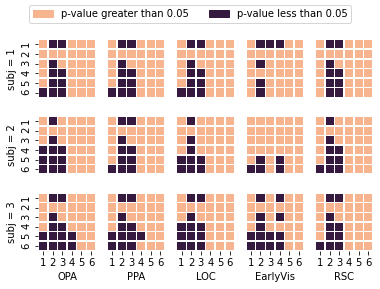

In [5]:
#generate permutation plots for normals
!mkdir /content/plots
import permutation as perm

labels_norm = ["taskonomy rgb2sfnorm",    # 1
          "ASTMT pretrained only",        # 2
          "ASTMT, NYUD, scratch",         # 3
          "ASTMT, NYUD, pretrained",      # 4
          "ASTMT, PASCAL, scratch",       # 5
          "ASTMT, PASCAL, pretrained"]    # 6
labels2_norm = [1, 2, 3, 4, 5, 6]

ptator = perm.Permutator()
ptator.load_permutations_and_pvalues("taskonomy_inference", "rgb2sfnorm", False, True, False, [3, 4], "rgb2sfnorm", result_path)
ptator.load_permutations_and_pvalues("astmt_inference", "imagenet_pretr", True, True, False, [3, 4], "rgb2sfnorm", result_path)

ptator.load_permutations_and_pvalues("astmt_inference", "nyud_normals_scratch_SSF", True, True, False, [3, 4],"rgb2sfnorm", result_path, "normals")
ptator.load_permutations_and_pvalues("astmt_inference", "nyud_normals_imagenet_SSF", True, True, False, [3, 4],"rgb2sfnorm", result_path, "normals")

ptator.load_permutations_and_pvalues("astmt_inference", "pascal_normals_scratch_SSF", True, True, False, [3, 4],"rgb2sfnorm", result_path, "normals")
ptator.load_permutations_and_pvalues("astmt_inference", "pascal_normals_imagenet_SSF", True, True, False, [3, 4],"rgb2sfnorm", result_path, "normals")

ptator.permutation_roiwise_two_stat_p(save_name="permutation_ps_rgb2sfnorm.p", save_dir=result_path)
ptator.plot_two_stat_ps(plot_alpha=0.05, figname="/content/plots/perm_pvalues_normals.png", tick_labels=labels2_norm, backend="agg", horizontal_yticks=True)

mkdir: cannot create directory ‘/content/plots’: File exists


/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


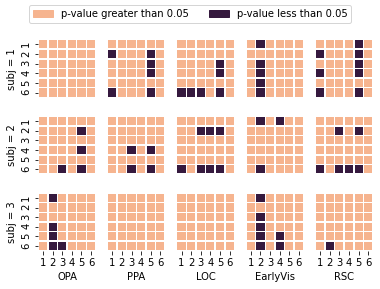

In [6]:
#generate permutation plots for edge2d
!mkdir /content/plots
import permutation as perm

labels_edge = ["taskonomy edge2d",        # 1
          "ASTMT pretrained only",        # 2
          "ASTMT, NYUD, scratch",         # 3
          "ASTMT, NYUD, pretrained",      # 4
          "ASTMT, PASCAL, scratch",       # 5
          "ASTMT, PASCAL, pretrained"]    # 6
labels2_edge = [1, 2, 3, 4, 5, 6]

ptator = perm.Permutator()
ptator.load_permutations_and_pvalues("taskonomy_inference", "edge2d", False, True, False, [3, 4],"edge2d", result_path)
ptator.load_permutations_and_pvalues("astmt_inference", "imagenet_pretr", True, True, False, [3, 4],"edge2d", result_path)

ptator.load_permutations_and_pvalues("astmt_inference", "nyud_edge_scratch_SSF", True, True, False, [3, 4],"edge2d", result_path, "edge")
ptator.load_permutations_and_pvalues("astmt_inference", "nyud_edge_imagenet_SSF", True, True, False, [3, 4],"edge2d", result_path, "edge")

ptator.load_permutations_and_pvalues("astmt_inference", "pascal_edge_scratch_SSF", True, True, False, [3, 4],"edge2d", result_path, "edge")
ptator.load_permutations_and_pvalues("astmt_inference", "pascal_edge_imagenet_SSF", True, True, False, [3, 4],"edge2d", result_path, "edge")

ptator.permutation_roiwise_two_stat_p(save_name="permutation_ps_edge2d.p", save_dir=result_path)
ptator.plot_two_stat_ps(plot_alpha=0.05, figname="/content/plots/perm_pvalues_edge.png", tick_labels=labels2_edge, backend="agg", horizontal_yticks=True)